In [3]:
import os 
import re 
import sys
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfTransformer

In [13]:

DATA_PATH = "data/Customers.csv"

def load_data(DATA_PATH):
    """"loading data from csv file"""
    if os.path.exists(DATA_PATH):
        print(f"Loading file: {DATA_PATH}")
        return pd.read_csv(DATA_PATH)
        
    # fallback: find first csv in data folder
    print(f"'{DATA_PATH}' not found. Searching 'data/' for any .csv file...")
    for root, _, files in os.walk('data'):
        for file in files:
            if file.endswith('.csv'):
                found_path = os.path.join(root, file)
                print(f"Found and loading fallback file: {found_path}")
                return pd.read_csv(found_path)
                
    raise FileNotFoundError("No CSV file found in data directory.")



# --- tweak to print data as the dataframe---

try:
    # 1. Call your function to load the data
    df = pd.DataFrame(load_data(DATA_PATH))
    
    # 2. Display the first 5 rows of the DataFrame
    print("\n--- DataFrame Head ---")
    print(df.head())

except FileNotFoundError as e:
    print(f"\nError: {e}")

Loading file: data/Customers.csv

--- DataFrame Head ---
   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  


In [19]:
Top=df.groupby(['Gender', 'Profession']).sum('Annual Income ($)').reset_index().sort_values(by='Annual Income ($)', ascending=False)
Top

,Gender,Profession,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,Female,Artist,378602,18728,41078884,19707,1590,1385
9,Male,Artist,229747,11263,25492383,12532,990,851
5,Female,Healthcare,185169,9193,22386044,9822,749,758
14,Male,Healthcare,143958,7026,15776556,7303,608,566
3,Female,Entertainment,142489,6609,14484697,6918,470,520
12,Male,Entertainment,105824,5363,11407481,5470,349,390
2,Female,Engineer,101229,5680,11175263,5166,419,383
4,Female,Executive,91213,4305,10335668,4854,357,335
1,Female,Doctor,86324,4174,9742222,4598,354,337
7,Female,Lawyer,78772,4095,9374329,4266,310,315


<Axes: title={'center': 'Top Professions by Annual Income'}, ylabel='Profession'>

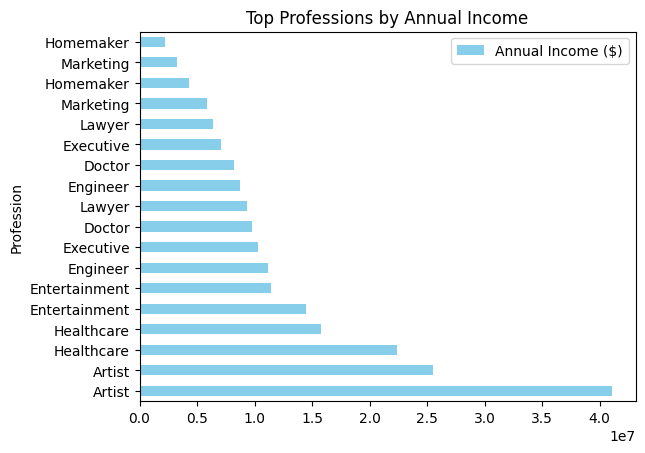

In [20]:
Top.plot.barh(x='Profession', y='Annual Income ($)', color='skyblue', title='Top Professions by Annual Income')